## Importe de Librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Creo el Numpy Structured Array para almacenar los datos

In [3]:
class Data(object):

    def __init__(self, path):
        self.dataset = self._build_dataset(path)

    def split(self, percentage):
        train_data = np.random.permutation(self.dataset)[:int(self.dataset.shape[0]*percentage),:self.dataset.shape[1]]
        test_data = np.random.permutation(self.dataset[~(np.isin(self.dataset,train_data).sum(axis=1)==3),:])[:int(self.dataset.shape[0]*(1-percentage)),:self.dataset.shape[1]]
        return train_data, test_data


    def _build_dataset(self, path):
        data = np.genfromtxt(path, dtype=None, names=True, delimiter=',', encoding=None)
        return data.reshape(data.shape[0],1)

In [6]:
#Le paso el path donde ir a buscar los datos
path = '/content/train_data.csv'

#Inicializo la clase
data = Data(path)

In [7]:
#Veo las dimensiones de la data
data.dataset.shape

(900, 1)

In [26]:
data_train, data_test = data.split(0.8)

In [27]:
data_train.shape

(720, 1)

In [28]:
data_train[:5]

array([[( 1.78597945, -0.16547688, 1.)],
       [(-1.10249067,  0.53890374, 0.)],
       [( 0.09006428,  0.88318111, 0.)],
       [(-0.30629632,  0.89796494, 0.)],
       [( 0.25364072, -0.40755354, 1.)]],
      dtype=[('x1', '<f8'), ('x2', '<f8'), ('y', '<f8')])

## Creo toda la arquitectura junta

In [45]:
class Perceptron_net():
    def __init__(self):
      self.b_l1 = 0
      self.b_l2 = 0
      self.b_l3 = 0
      self.w_l1 = 0
      self.w_l2 = 0
      self.w_l3 = 0
      self.W1_record = []
      self.W2_record = []
      self.W3_record = []
      self.b1_record = []
      self.b2_record = []
      self.b3_record = []
      self.err_record = []
      

    def train(self, x_train, y_train, lr=0.01, n_epochs=5000, b=10):
      f = x_train.shape[0]
      c = x_train.shape[1]

      #W Inicialization
      self.b_l1 = np.random.normal(0,1,(3,1))
      self.b_l2 = np.random.normal(0,1,(2,1))
      self.b_l3 = np.random.normal(0,1,(1,1))
      self.w_l1 = np.random.normal(0,1,(2,3)) # dim = 2x3
      self.w_l2 = np.random.normal(0,1,(3,2)) # dim = 3x2
      self.w_l3 = np.random.normal(0,1,(2,1)) # dim = 2x1


      for epoch in range(0,n_epochs):
        idx = np.random.permutation(f)
        x = x_train[idx]
        y = y_train[idx]
        batch_size = int(f/b)
        
        self.W1_record.append(self.w_l1)
        self.W2_record.append(self.w_l2)
        self.W3_record.append(self.w_l3)
        self.b1_record.append(self.b_l1)
        self.b2_record.append(self.b_l2)
        self.b3_record.append(self.b_l3)


        for n in range(0,f, batch_size):
          end = n + batch_size if n + batch_size <= f else f
          batch_x = x_train[n:end].T  #dim 2 x batch
          batch_y = y_train[n:end].T 
          
          
          # ====== Forward =========
          
          #Layer 1
          z_l1 = self.w_l1.T @ batch_x + self.b_l1 # dim 3 x batch
          a_l1 = 1/ (1 + np.exp(-1* z_l1)) # dim 3 xbatch
          
          #Layer 2
          z_l2 = self.w_l2.T @ a_l1 + self.b_l2 # dim 2xbatch
          a_l2 = 1/ (1 + np.exp(-1* z_l2)) # dim 2 xbatch
          
          #Output Layer
          z_l3 = self.w_l3.T @ a_l2 + self.b_l3 # dim 1xbatch
          a_l3 = 1/ (1 + np.exp(-1* z_l3)) # dim 1 xbatch

          # ====== Backprop =========
          # Calculos de Gradientes

          #Output Layer
          
          d_err = -2 * (batch_y - a_l3) # dim 1 xbatch
          dz_l3 = d_err * a_l3 * (1-a_l3)  # dim 1 xbatch
          grad_w_l3 = (1/batch_size) * dz_l3 @ a_l2.T
          grad_b_l3 = (1/batch_size) * np.sum(dz_l3, axis=1, keepdims=True)
          

          # Layer 2
          dz_l2 = (self.w_l3 @ dz_l3) * a_l2 * (1-a_l2)
          grad_w_l2 = (1/batch_size) * dz_l2 @ a_l1.T
          grad_b_l2 = (1/batch_size) * np.sum(dz_l2, axis=1, keepdims=True)
          

          # Layer 1
          dz_l1 = (self.w_l2 @ dz_l2) * a_l1 * (1- a_l1)
          grad_w_l1 = (1/batch_size) * dz_l1 @ batch_x.T
          grad_b_l1 = (1/batch_size) * np.sum(dz_l1, axis=1, keepdims=True)
          
          
          # Actualizacion de Parametros

          #Me esta dando que grad_b_l1 de dimensiones (3,1) y si lo transpongo no me dan las dim
          
          self.b_l1 = self.b_l1 - lr * grad_b_l1
          self.b_l2 = self.b_l2 - lr * grad_b_l2
          self.b_l3 = self.b_l3 - lr * grad_b_l3
          self.w_l1 = self.w_l1 - lr * grad_w_l1.T
          self.w_l2 = self.w_l2 - lr * grad_w_l2.T
          self.w_l3 = self.w_l3 - lr * grad_w_l3.T


        #Calculo error para graficos
        self.err_record.append(np.mean((batch_y - a_l3)**2))
        


    def predict(self, x_test):
      z_l1 = 0
      a_l1 = 0
      z_l2 = 0
      a_l2 = 0
      z_l3 = 0
      y_hat = 0
      x = x_test.T 

      #Layer 1
      z_l1 = self.w_l1.T @ x + self.b_l1 
      a_l1 = 1/ (1 + np.exp(-1* z_l1)) 
      #Layer 2
      z_l2 = self.w_l2.T @ a_l1 + self.b_l2 
      a_l2 = 1/ (1 + np.exp(-1* z_l2)) 
      #Output Layer
      z_l3 = self.w_l3.T @ a_l2 + self.b_l3
      y_hat = 1/ (1 + np.exp(-1* z_l3)) 

      return y_hat




## Realizo el entrenamiento

In [46]:
#Inicializo la red
two_layer_net = Perceptron_net()

#Arreglo las dimensiones de los datos
x_train = np.hstack((data_train[['x1','x2']]['x1'],data_train[['x1','x2']]['x2']))

#Ejecuto el fit de la red
two_layer_net.train(x_train, data_train['y'], n_epochs=10000)

In [51]:
#Arreglo las dimensiones de los datos
x_test = np.hstack((data_test[['x1','x2']]['x1'],data_test[['x1','x2']]['x2']))


#Ejecuto el fit de la red
y_pred = two_layer_net.predict(x_test)

In [53]:
y_pred[y_pred>=0.5]=1
y_pred[y_pred<0.5]=0

array([[0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
        1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1.,
        0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
        1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
        0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
        0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
        0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
        0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
        1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
        1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
        1., 0., 1.]])

In [56]:
class classification_metrics:
 
    def __init__(self, truth, prediction):
        self.suma = truth + prediction
        self.resta = truth - prediction
        self.TP = (self.suma == 2).sum()
        self.TN = (self.suma == 0).sum()
        self.FP = (self.resta == -1).sum()
        self.FN = (self.suma == 1).sum()
        
    
    def acc (self):
        accuracy = (self.TP+self.TN)/(self.TP+self.FP+self.TN+self.FN)
        return accuracy

In [63]:
meds = classification_metrics(data_test['y'], y_pred.T)

meds.acc()

0.8324607329842932

## Resultados del entrenamiento

### Learning Curve

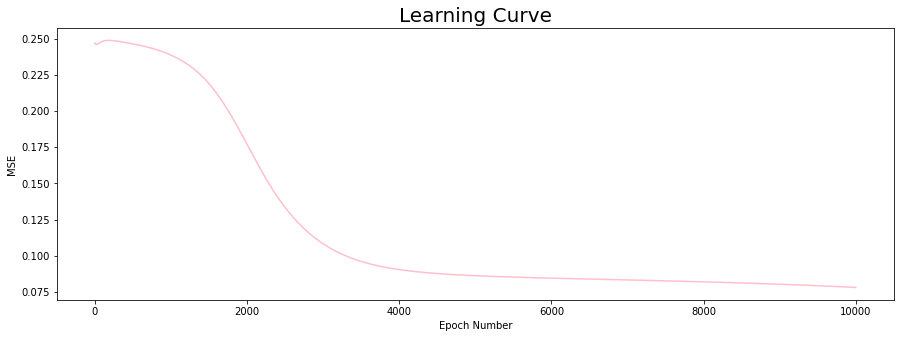

In [30]:
plt.figure(figsize=(15,5))
plt.plot(list(range(0,len(two_layer_net.err_record))), two_layer_net.err_record, color='pink')
plt.title('Learning Curve', size=20)
plt.xlabel('Epoch Number')
plt.ylabel('MSE')
plt.show()



### Evolucion de los pesos

In [31]:
# Extraccion de los pesos de las variables de record

w1_l1_n1 = [two_layer_net.W1_record[num][0][0] for num in range(0,len(two_layer_net.W1_record))]
w1_l1_n2 = [two_layer_net.W1_record[num][0][1] for num in range(0,len(two_layer_net.W1_record))]
w1_l1_n3 = [two_layer_net.W1_record[num][0][2] for num in range(0,len(two_layer_net.W1_record))]

w2_l1_n1 = [two_layer_net.W1_record[num][1][0] for num in range(0,len(two_layer_net.W1_record))]
w2_l1_n2 = [two_layer_net.W1_record[num][1][1] for num in range(0,len(two_layer_net.W1_record))]
w2_l1_n3 = [two_layer_net.W1_record[num][1][2] for num in range(0,len(two_layer_net.W1_record))]

w1_l2_n1 = [two_layer_net.W2_record[num][0][0] for num in range(0,len(two_layer_net.W2_record))]
w1_l2_n2 = [two_layer_net.W2_record[num][0][1] for num in range(0,len(two_layer_net.W2_record))]

w2_l2_n1 = [two_layer_net.W2_record[num][1][0] for num in range(0,len(two_layer_net.W2_record))]
w2_l2_n2 = [two_layer_net.W2_record[num][1][1] for num in range(0,len(two_layer_net.W2_record))]

w3_l2_n1 = [two_layer_net.W2_record[num][2][0] for num in range(0,len(two_layer_net.W2_record))]
w3_l2_n2 = [two_layer_net.W2_record[num][2][1] for num in range(0,len(two_layer_net.W2_record))]

w_l3_n1 = [two_layer_net.W1_record[num][0] for num in range(0,len(two_layer_net.W1_record))]

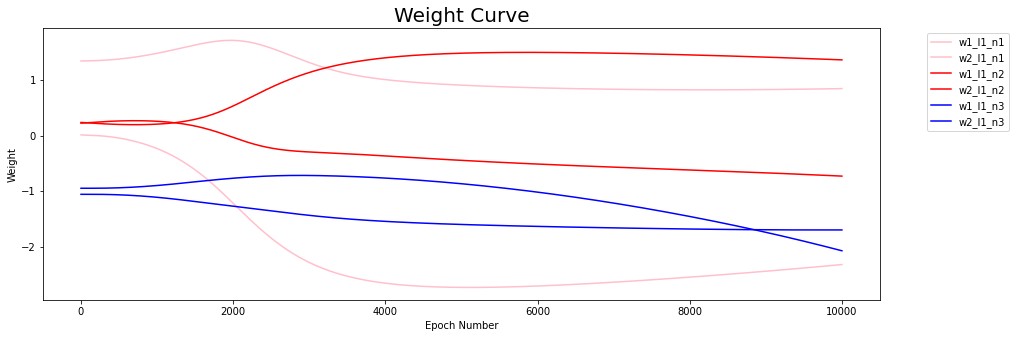

In [32]:
plt.figure(figsize=(15,5))
plt.plot(list(range(0,len(two_layer_net.W1_record))), w1_l1_n1 , color='pink', label='w1_l1_n1')
plt.plot(list(range(0,len(two_layer_net.W1_record))), w2_l1_n1 , color='pink', label='w2_l1_n1')
plt.plot(list(range(0,len(two_layer_net.W1_record))), w1_l1_n2 , color='red', label='w1_l1_n2')
plt.plot(list(range(0,len(two_layer_net.W1_record))), w2_l1_n2 , color='red', label='w2_l1_n2')
plt.plot(list(range(0,len(two_layer_net.W1_record))), w1_l1_n3 , color='blue', label='w1_l1_n3')
plt.plot(list(range(0,len(two_layer_net.W1_record))), w2_l1_n3 , color='blue', label='w2_l1_n3')
plt.title('Weight Curve', size=20)
plt.xlabel('Epoch Number')
plt.ylabel('Weight')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Evolucion de los Bias

In [33]:
# Extraccion de los bias de las variables de record
b_l1_n1 = [two_layer_net.b1_record[num][0][0] for num in range(0,len(two_layer_net.b1_record))]
b_l1_n2 = [two_layer_net.b1_record[num][1][0] for num in range(0,len(two_layer_net.b1_record))]
b_l1_n3 = [two_layer_net.b1_record[num][2][0] for num in range(0,len(two_layer_net.b1_record))]

b_l2_n1 = [two_layer_net.b2_record[num][0][0] for num in range(0,len(two_layer_net.b2_record))]
b_l2_n2 = [two_layer_net.b2_record[num][1][0] for num in range(0,len(two_layer_net.b2_record))]


b_l3_n1 = [two_layer_net.b3_record[num][0][0] for num in range(0,len(two_layer_net.b3_record))]

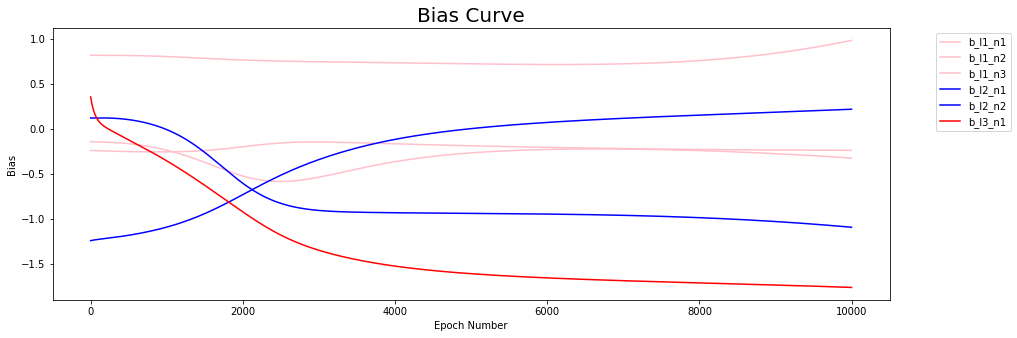

In [34]:
plt.figure(figsize=(15,5))
plt.plot(list(range(0,len(two_layer_net.W1_record))), b_l1_n1 , color='pink', label='b_l1_n1')
plt.plot(list(range(0,len(two_layer_net.W1_record))), b_l1_n2 , color='pink', label='b_l1_n2')
plt.plot(list(range(0,len(two_layer_net.W1_record))), b_l1_n3 , color='pink', label='b_l1_n3')
plt.plot(list(range(0,len(two_layer_net.W1_record))), b_l2_n1 , color='blue', label='b_l2_n1')
plt.plot(list(range(0,len(two_layer_net.W1_record))), b_l2_n2 , color='blue', label='b_l2_n2')
plt.plot(list(range(0,len(two_layer_net.W1_record))), b_l3_n1 , color='red', label='b_l3_n1')
plt.title('Bias Curve', size=20)
plt.xlabel('Epoch Number')
plt.ylabel('Bias')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()